<a href="https://colab.research.google.com/github/kalninguilherme/aulas_eda_pandas/blob/main/Exerc%C3%ADcio01_Introdu%C3%A7%C3%A3o_ao_Google_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Inserir o dataset dentro do projeto e mostrar as primeiras 5 linhas
df = pd.read_csv('medalhas.csv')
df.head()

,medal_type,medal_code,medal_date,name,country_code,gender,discipline,event,event_type,url_event,code
0,Gold Medal,1,2024-07-27,Remco EVENEPOEL,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136
1,Silver Medal,2,2024-07-27,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520
2,Bronze Medal,3,2024-07-27,Wout van AERT,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147
3,Gold Medal,1,2024-07-27,Grace BROWN,AUS,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173
4,Silver Medal,2,2024-07-27,Anna HENDERSON,GBR,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525


In [ ]:
# Mostrar as respectivas colunas
df.columns

Index(['medal_type', 'medal_code', 'medal_date', 'name', 'country_code',
       'gender', 'discipline', 'event', 'event_type', 'url_event', 'code'],
      dtype='object')

In [ ]:
# Alterar o nome das colunas
df = df.rename(columns={'medal_type': 'medalha', 'medal_code': 'codigo_medalha', 'medal_date': 'data_medalha', 'name': 'nome_atleta',
                        'country_code': 'codigo_pais', 'gender': 'genero', 'discipline': 'modalidade', 'event': 'evento', 'event_type': 'tipo_evento', 'code': 'codigo'
                        })
df.head()

,medalha,codigo_medalha,data_medalha,nome_atleta,codigo_pais,genero,modalidade,evento,tipo_evento,url_event,codigo
0,Gold Medal,1,2024-07-27,Remco EVENEPOEL,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903136
1,Silver Medal,2,2024-07-27,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1923520
2,Bronze Medal,3,2024-07-27,Wout van AERT,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1903147
3,Gold Medal,1,2024-07-27,Grace BROWN,AUS,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1940173
4,Silver Medal,2,2024-07-27,Anna HENDERSON,GBR,W,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1912525


In [ ]:
# Retirar a coluna Url_Event (ela não tem valor para nossa análise)
df = df.drop(columns=['url_event', 'codigo'], axis=1)
df.head()


,medalha,codigo_medalha,data_medalha,nome_atleta,codigo_pais,genero,modalidade,evento,tipo_evento,codigo
0,Gold Medal,1,2024-07-27,Remco EVENEPOEL,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,1903136
1,Silver Medal,2,2024-07-27,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,1923520
2,Bronze Medal,3,2024-07-27,Wout van AERT,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,1903147
3,Gold Medal,1,2024-07-27,Grace BROWN,AUS,W,Cycling Road,Women's Individual Time Trial,ATH,1940173
4,Silver Medal,2,2024-07-27,Anna HENDERSON,GBR,W,Cycling Road,Women's Individual Time Trial,ATH,1912525


In [ ]:
# Alterar as medalhas do inglês para o português
df['medalha'].replace({'Gold Medal': 'Ouro', 'Silver Medal': 'Prata', 'Bronze Medal': 'Bronze'}, inplace=True)
df.head()

,medalha,codigo_medalha,data_medalha,nome_atleta,codigo_pais,genero,modalidade,evento,tipo_evento,codigo
0,Ouro,1,2024-07-27,Remco EVENEPOEL,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,1903136
1,Prata,2,2024-07-27,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,1923520
2,Bronze,3,2024-07-27,Wout van AERT,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,1903147
3,Ouro,1,2024-07-27,Grace BROWN,AUS,W,Cycling Road,Women's Individual Time Trial,ATH,1940173
4,Prata,2,2024-07-27,Anna HENDERSON,GBR,W,Cycling Road,Women's Individual Time Trial,ATH,1912525


In [ ]:
# Alterar a data de AAAA/MM/DD para DD/MM/AAAA
df['data_medalha'] = pd.to_datetime(df['data_medalha']).dt.strftime('%d/%m/%Y')
df.head()


,medalha,codigo_medalha,data_medalha,nome_atleta,codigo_pais,genero,modalidade,evento,tipo_evento,codigo
0,Ouro,1,27/07/2024,Remco EVENEPOEL,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,1903136
1,Prata,2,27/07/2024,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,1923520
2,Bronze,3,27/07/2024,Wout van AERT,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,1903147
3,Ouro,1,27/07/2024,Grace BROWN,AUS,W,Cycling Road,Women's Individual Time Trial,ATH,1940173
4,Prata,2,27/07/2024,Anna HENDERSON,GBR,W,Cycling Road,Women's Individual Time Trial,ATH,1912525


In [ ]:
# Criar

In [ ]:
df.isnull().sum()

,0
medalha,0
codigo_medalha,0
data_medalha,0
nome_atleta,0
codigo_pais,0
genero,0
modalidade,0
evento,0
tipo_evento,0
codigo,0


In [ ]:
df.dtypes

,0
medalha,object
codigo_medalha,int64
data_medalha,object
nome_atleta,object
codigo_pais,object
genero,object
modalidade,object
evento,object
tipo_evento,object
codigo,object


In [ ]:
df['data_medalha'] = pd.to_datetime(df['data_medalha'])

df.dtypes

<ipython-input-10-24d6d7075b9a>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['data_medalha'] = pd.to_datetime(df['data_medalha'])


,0
medalha,object
codigo_medalha,int64
data_medalha,datetime64[ns]
nome_atleta,object
codigo_pais,object
genero,object
modalidade,object
evento,object
tipo_evento,object
codigo,object


In [ ]:
df.describe()

,codigo_medalha,data_medalha
count,1034.000000,1034
mean,2.053191,2024-08-04 10:08:35.280464128
min,1.000000,2024-07-27 00:00:00
25%,1.000000,2024-08-01 00:00:00
50%,2.000000,2024-08-05 00:00:00
75%,3.000000,2024-08-08 00:00:00
max,3.000000,2024-08-11 00:00:00
std,0.825580,NaN


In [ ]:
df['data_medalha'] = df['data_medalha'].dt.strftime('%d/%m/%Y')
df.head()

,medalha,codigo_medalha,data_medalha,nome_atleta,codigo_pais,genero,modalidade,evento,tipo_evento,codigo
0,Ouro,1,27/07/2024,Remco EVENEPOEL,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,1903136
1,Prata,2,27/07/2024,Filippo GANNA,ITA,M,Cycling Road,Men's Individual Time Trial,ATH,1923520
2,Bronze,3,27/07/2024,Wout van AERT,BEL,M,Cycling Road,Men's Individual Time Trial,ATH,1903147
3,Ouro,1,27/07/2024,Grace BROWN,AUS,W,Cycling Road,Women's Individual Time Trial,ATH,1940173
4,Prata,2,27/07/2024,Anna HENDERSON,GBR,W,Cycling Road,Women's Individual Time Trial,ATH,1912525


In [ ]:
# prompt: conte os valores apenas dos países que possuem valores maiores que 1 em codigo_pais

df['codigo_pais'].value_counts()[df['codigo_pais'].value_counts() > 10]


,count
codigo_pais,
USA,126
CHN,90
GBR,64
FRA,64
AUS,53
JPN,45
ITA,38
NED,34
KOR,32


In [ ]:
df.groupby('codigo_pais').count().sort_values(by='medalha' , ascending=False)

,medalha,codigo_medalha,data_medalha,nome_atleta,genero,modalidade,evento,tipo_evento,codigo
codigo_pais,,,,,,,,,
USA,126,126,126,126,126,126,126,126,126
CHN,90,90,90,90,90,90,90,90,90
GBR,64,64,64,64,64,64,64,64,64
FRA,64,64,64,64,64,64,64,64,64
AUS,53,53,53,53,53,53,53,53,53
...,...,...,...,...,...,...,...,...,...
MGL,1,1,1,1,1,1,1,1,1
EOR,1,1,1,1,1,1,1,1,1
FIJ,1,1,1,1,1,1,1,1,1


In [ ]:
df.groupby('codigo_pais', as_index=False)['medalha'].count().sort_values(by='medalha', ascending=False).head(10)

,codigo_pais,medalha
89,USA,126
15,CHN,90
33,GBR,64
32,FRA,64
5,AUS,53
49,JPN,45
46,ITA,38
62,NED,34
35,GER,32
53,KOR,32


In [ ]:
df.groupby('modalidade')['medalha'].count().sort_values(ascending=False)

,medalha
modalidade,
Athletics,142
Swimming,105
Wrestling,72
Judo,60
Boxing,52
Shooting,45
Artistic Gymnastics,43
Rowing,42
Fencing,36


In [ ]:
# prompt: Calcule o número de medalhas por modalidade e tipo de evento

df.groupby(['modalidade', 'tipo_evento'])['medalha'].count().sort_values(ascending=False)


,,medalha
modalidade,tipo_evento,
Athletics,ATH,124
Swimming,ATH,84
Wrestling,HATH,72
Judo,HATH,56
Boxing,HATH,52
...,...,...
Judo,HTEAM,4
Table Tennis,HCOUP,3
Triathlon,TEAM,3


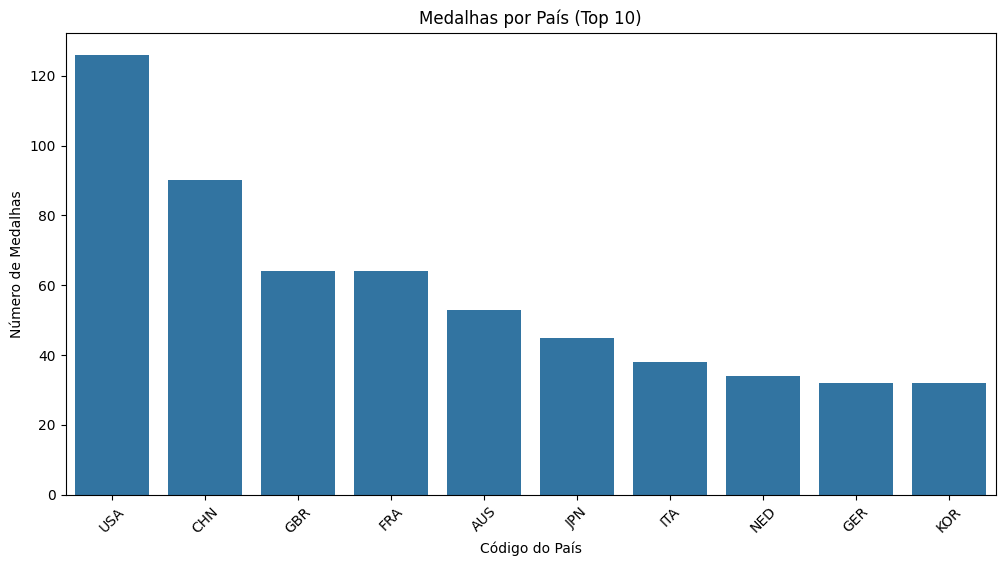

In [ ]:
# prompt: Gere um gráfico de barras para as medalhas por país

medalhas_por_pais = df.groupby('codigo_pais', as_index=False)['medalha'].count().sort_values(by='medalha', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='codigo_pais', y='medalha', data=medalhas_por_pais)
plt.title('Medalhas por País (Top 10)')
plt.xlabel('Código do País')
plt.ylabel('Número de Medalhas')
plt.xticks(rotation=45)
plt.show()
